In [33]:
import pandas as pd
import h5py
from collections import defaultdict
import numpy as np
import seaborn as sb

In [90]:
anno = pd.read_csv("../all_marks/" + "H3K9me3" + "/peaks_anno.csv", sep="\t")

In [91]:
anno.head()

,seqnames,start,end,width,strand,peak,feature,start_position,end_position,feature_strand,insideFeature,distancetoFeature,shortestDistance,fromOverlappingOrNearest
0,chr1,180808,181706,899,*,peak_1,ENSG00000279928.2,182696.0,184174.0,+,upstream,-1888.0,990.0,Overlapping
1,chr1,629717,630164,448,*,peak_2,ENSG00000225630.1,629640.0,630683.0,+,inside,77.0,77.0,Overlapping
2,chr1,629717,630164,448,*,peak_2,ENSG00000225972.1,629062.0,629433.0,+,downstream,655.0,284.0,Overlapping
3,chr1,629717,630164,448,*,peak_2,ENSG00000230021.10,586071.0,827796.0,-,inside,198079.0,43646.0,Overlapping
4,chr1,629717,630164,448,*,peak_2,ENSG00000237973.1,631074.0,632616.0,+,upstream,-1357.0,910.0,Overlapping


In [26]:
targets = [("H3K27ac", "_narrow"), ("H3K36me3", ""), 
           ("H3K4me1", "_narrow"), ("H3K4me2", "_narrow"), ("H3K4me3", "_narrow"), ("H3K79me2", ""), 
           ("H3K9ac", "_narrow"), ("H3K9me3", ""), ("H4K20me1", ""), ("H3K27me3", "")]

In [81]:
#JPX - H3K9me3
#FTX - Methylation
chrom_counts = defaultdict(dict)
peaks_dict = defaultdict(dict)
for t in targets:
    print(t[0])
    with h5py.File("../all_marks/" + t[0] + "/lncRNA_Peaks_corrs/lncRNA_Peaks_Correlations_corrected_non_zero.hdf5", 'r') as f:
        corr = f['corrs_matrix'][:]
        print(corr.shape)
        lncRNAsNames = f['lncRNAs_names'][:]
        peaks = pd.read_csv("../all_marks/" + t[0] + "/merged_peaks_first_in_biosample.bed", sep="\t", header=None)
        
        for i in range(0, corr.shape[0]):
            row = corr[i, :]
            lncRNA = lncRNAsNames[i]
            if(lncRNA == 'ENSG00000229807'):
                print('Xist!')
            nonzero_corrs = row[np.nonzero(row)[0]]
            nonzero_peaks = ["peak_" + str(i) for i in np.nonzero(row)[0]]
            chrom_counts[lncRNA][t[0]] = peaks[peaks[3].isin(nonzero_peaks)][0].value_counts()
            peaks_dict[lncRNA][t[0]] = list(peaks[peaks[3].isin(nonzero_peaks)][3])
            

H3K27ac
(2031, 1018625)
Xist!
H3K36me3
(1321, 424010)
H3K4me1
(1954, 1009358)
Xist!
H3K4me3
(1752, 743721)
H3K79me2
(802, 264752)
Xist!
H3K9ac
(1104, 370418)
H3K9me3
(1079, 353519)
H4K20me1
(841, 238524)
Xist!
H3K27me3
(1401, 267955)


In [89]:
chrom_counts['ENSG00000225470']['H3K9me3']

chrX                      1847
chrY                       312
chr1                        22
chr4                        19
chr7                        18
chr5                        17
chr6                        16
chr3                        16
chr11                       13
chr13                       12
chr2                        10
chr8                        10
chr10                        9
chr12                        8
chr15                        7
chr18                        6
chr14                        6
chr9                         5
chr16                        4
chr20                        3
chr22                        3
chr17                        3
chrY_KI270740v1_random       2
chr19                        1
Name: 0, dtype: int64

In [94]:
a = anno[anno['peak'].isin(peaks_dict['ENSG00000225470']['H3K9me3'])]
len(a[a['seqnames'] == 'chrX']['feature'].unique())

528

In [82]:
#FTX -ENSG00000230590
#JPX - ENSG00000225470
#Xist - ENSG00000229807
df = pd.DataFrame(chrom_counts['ENSG00000229807'])

In [75]:
df.sort_values(['H3K27ac'], ascending=False)['H3K27ac']

chr1                       12.0
chr5                       12.0
chr12                      10.0
chrX                       10.0
chr11                      10.0
chr2                        9.0
chr7                        8.0
chr17                       8.0
chr8                        7.0
chr15                       6.0
chr10                       6.0
chr14                       6.0
chr16                       4.0
chr19                       4.0
chr20                       4.0
chr22                       4.0
chr3                        4.0
chr4                        4.0
chr6                        4.0
chr13                       3.0
chr18                       3.0
chr9                        1.0
chr21                       1.0
chr22_KI270733v1_random     NaN
Name: H3K27ac, dtype: float64

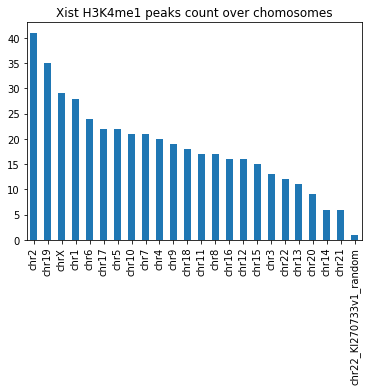

In [77]:
df.sort_values(['H3K4me1'], ascending=False)['H3K4me1'].plot(title="Xist H3K4me1 peaks count over chomosomes", kind="bar")

In [ ]:
#Methylation

In [55]:
chrom_counts = defaultdict(dict)
names = []
for chunk in range(0, 19):
    print(chunk)
    with h5py.File("../all_marks/" + "methylation" + "/lncRNA_Peaks_corrs/lncRNA_Peaks_Correlations_corrected_non_zero_" + str(chunk) + ".hdf5", 'r') as f:
        lncRNAsNames = f['lncRNAs_names'][:]
        names.extend(lncRNAsNames)
        if "ENSG00000229807" in lncRNAsNames:
            i = list(lncRNAsNames).index("ENSG00000229807")
            row = f['corrs_matrix'][i, :]
            print("index: " + str(i))
            peaks = pd.read_csv("../all_marks/" + "methylation" + "/merged_peaks_first_in_biosample.bed", sep="\t", header=None)

            lncRNA = lncRNAsNames[i]
            nonzero_corrs = row[np.nonzero(row)[0]]
            nonzero_peaks = ["peak_" + str(i) for i in np.nonzero(row)[0]]
            chrom_counts[lncRNA]["methylation"] = peaks[peaks[3].isin(nonzero_peaks)][0].value_counts()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


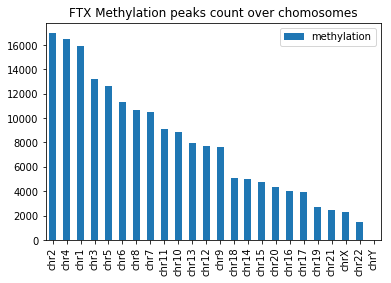

In [52]:
pd.DataFrame(chrom_counts['ENSG00000230590']).plot(title="FTX Methylation peaks count over chomosomes", kind="bar")